<a href="https://colab.research.google.com/github/Elbrus1969/mysite/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O 'w.xls.gz' http://37.9.3.252/download/files.synop/26/26179.01.01.2013.04.03.2021.1.0.0.ru.utf8.00000000.xls.gz

--2021-03-04 20:13:52--  http://37.9.3.252/download/files.synop/26/26179.01.01.2013.04.03.2021.1.0.0.ru.utf8.00000000.xls.gz
Connecting to 37.9.3.252:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2012154 (1.9M) [application/octet-stream]
Saving to: ‘w.xls.gz’

w.xls.gz            100%[===================>]   1.92M   860KB/s    in 2.3s    

2021-03-04 20:13:55 (860 KB/s) - ‘w.xls.gz’ saved [2012154/2012154]



In [ ]:
!gzip -d 'w.xls.gz'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

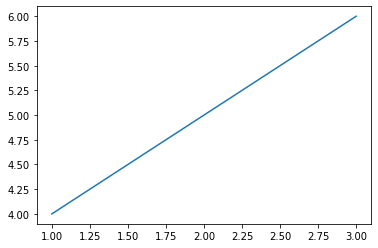

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
plt.plot(x, y)

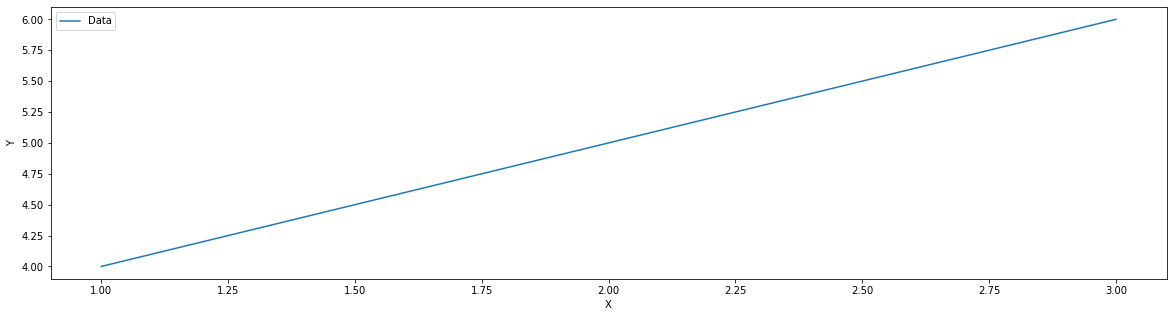

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(x, y, label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [ ]:
import pandas as pd
data = pd.read_excel('w.xls', skiprows=6)
data.head(10)

FileNotFoundError: ignored

In [ ]:
data['T']

In [ ]:
data.columns

In [ ]:
x = data.index
y = data['T']
plt.plot(x, y)

In [ ]:
d = data['Местное время в Великом Новгороде']

In [ ]:
date = pd.to_datetime(d, dayfirst=True)

x = date
y = data['T']
plt.plot(x, y)

In [ ]:
data['date'] = date
data

In [ ]:
data = data.sort_values('date')
data = data.reset_index(drop=True)
data

In [ ]:
date = pd.to_datetime(d, dayfirst=True)

x = data['date']
y = data['T']
plt.figure(figsize=(25, 5))
plt.plot(x, y)


In [ ]:
data['T'].max(), data['T'].min()

In [ ]:
data['T'].mean()

In [ ]:
data['T_min'] = data['T'].min()
data['T_min']

In [ ]:
data['T_max'] = data['T'].max()
data['T_max']


In [ ]:
data['T_min'] = data['T'].min()
data['T_max'] = data['T'].max()
data['T_mean'] = data['T'].mean()

plt.figure(figsize=(25, 5))
plt.plot(x, data['T'])
plt.plot(x, data['T_min'])
plt.plot(x, data['T_max'])
plt.plot(x, data['T_mean'])

In [ ]:
data['T'].rolling(3).mean()

In [ ]:
plt.figure(figsize=(25, 5))
plt.plot_date(x, data['T'])
plt.plot_date(x, data['T'].rolling(240).mean())

In [ ]:
data['T'].hist()

In [ ]:
data['T'].quantile(0.95)


In [ ]:

data['T'].quantile(0.05)

In [ ]:
data['T'].quantile(0.95)


In [ ]:
data['T_quantile99'] = data['T'].quantile(0.99)
data['T_quantile01'] = data['T'].quantile(0.01)

data['T'].quantile(0.99), data['T'].quantile(0.01)


In [ ]:

plt.figure(figsize=(25, 5))
plt.plot_date(x, data['T'])
plt.plot_date(x, data['T_quantile99'])
plt.plot_date(x, data['T_quantile01'])

In [ ]:
data.corr().round(3)

In [ ]:
pd.plotting.autocorrelation_plot(data['T'].dropna())